In [ ]:
pip install google-play-scraper pandas matplotlib scikit-learn seaborn TurkishStemmer nltk

Kütüphane Yükleme Programınızın çalışabilmesi için gerekli kütüphaneleri yüklüyorsunuz:

- google-play-scraper: Google Play Store'dan uygulama yorumlarını çekmek için kullanılır.
- pandas: Verileri işlemek ve analiz etmek için güçlü bir kütüphanedir.
- matplotlib: Veriyi görselleştirmek için kullanılır.
- scikit-learn: Makine öğrenimi algoritmalarını ve araçlarını sağlar.
- seaborn: Gelişmiş veri görselleştirmeleri için kullanılır.

In [ ]:
from google_play_scraper import reviews
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
import seaborn as sns
from TurkishStemmer import TurkishStemmer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import numpy as np
from math import pi

- from google_play_scraper import reviews: Google Play Store'dan uygulama yorumlarını çekmek için google_play_scraper kütüphanesinin reviews fonksiyonunu içeri aktarıyor. Bu, uygulama incelemelerini ve ilgili bilgileri almak için kullanılır.

- import pandas as pd: Veri işleme ve analiz işlemleri için pandas kütüphanesini pd kısaltmasıyla içeri aktarıyor. Bu kütüphane, veri çerçeveleri (DataFrame) ve serilerle (Series) çalışma yeteneği sağlar.

- import matplotlib.pyplot as plt: Veri görselleştirme için matplotlib kütüphanesinin pyplot modülünü plt kısaltmasıyla içeri aktarıyor. Bu, grafikler ve çizimler oluşturmak için kullanılır.

- from sklearn.metrics import confusion_matrix: Makine öğrenimi modelinin performansını değerlendirmek için scikit-learn kütüphanesinin confusion_matrix fonksiyonunu içeri aktarıyor. Bu fonksiyon, modelin tahminlerinin gerçek etiketlerle karşılaştırılmasını sağlar.

- import seaborn as sns: İleri düzey veri görselleştirme için seaborn kütüphanesini sns kısaltmasıyla içeri aktarıyor. seaborn, matplotlib üzerine inşa edilmiştir ve daha estetik görselleştirmeler sağlar.

In [5]:
# Stopwords yükleme
stopwords_file = 'C:/stopwords.txt'
with open(stopwords_file, 'r', encoding='utf-8') as file:
    stopwords = file.read().splitlines()

# Uygulama bilgileri
app_id = 'com.Polystation.BuildABabe'
num_reviews = 10000
language = 'tr'

# Yorumları çekme
result, _ = reviews(
    app_id,
    lang=language,
    count=num_reviews
)

In [7]:
pozitifler = ["güzel", "guzel", "harika", "mükemmel", "mük", "çok iyi", "beğendim", "super", "keyif", "bayıldım", "iyi", 
              "harikulade", "muhteşem", "şahane", "olağanüstü", "mükemmel", "süper", "çok hoş", "çok güzel", "hoş", "tatmin edici"]

elestirisel = ["belki", "bence", "sizce", "öneri", "yapmalı", "yapılmalı", "yeterince", "kanımca", "tavsiye ederim",
               "fikir", "düşünce", "geliştirilebilir", "değiştirilmeli", "daha iyi olabilir", "öneririm", "eleştiri", 
               "daha iyi olmalı", "daha iyisi mümkün"]

negatifler = ["kötü", "güzel değil", "kotu", "berbat", "memnun kalmadım", "rezalet", "nefret", " lan ", "iğrenç", 
              "sıkıcı", "indirmeyin", "iyi değil", "hiç güzel", "tavsiye etmem", "kasıyor", "iyi deyil", "tavsiye etmiyorum",
              "beğenmedim", "berbat", "çok kötü", "rezil", "korkunç", "fena", "uyduruk", "berbat", "berbat ötesi", "rezil", 
              "hiç beğenmedim"]

notrler = ["orta", "fena değil", "idare eder", "eh işte", "normal", "vasat", "orta karar", "ne iyi ne kötü", "ortalama",
           "eh", "kabul edilebilir", "ortalama", "ne iyi ne kötü", "vasatın üstü", "vasatın altı", "standart"]

sitemler = [" of ", " ya ", "neden", "saçma", "aykırı", "sacma", "neden böyle", "bu ne", "niye", "saçmalık", "çok saçma",
            "saçma sapan", "yazık", "niye böyle", "hiç beğenmedim", "bu nasıl", "hayal kırıklığı", "hayret", "inanamıyorum",
            "çok ayıp", "ayıp", "şaşkınlık", "garip", "abuk", "of ya", "niye ki", "hayret bir şey"]

Bu listeleri oluşturmanızın amacı, metinlerdeki duyguları ve anlamları daha iyi anlamaktır. Pozitif ve negatif ifadeleri tanımlayarak yorumların tonunu belirleyebilir, öneri ve eleştiri kelimeleriyle kullanıcı geri bildirimlerini analiz edebilirsiniz. Bu, duygu analizi yaparken size yardımcı olur.

In [9]:
def etiketle(yorum):
    yorum = yorum.lower()
    for kelime in elestirisel:
        if kelime in yorum:
            return 'eleştiri'
    for kelime in notrler:
        if kelime in yorum:
            return 'nötr'
    for kelime in negatifler:
        if kelime in yorum:
            return 'negatif'
    for kelime in pozitifler:
        if kelime in yorum:
            return 'pozitif'
    for kelime in sitemler:
        if kelime in yorum:
            return 'şikayet'
    return 'Bilinmiyor'

Bu fonksiyon, bir yorumu analiz ederek onu uygun bir kategoriye ayırır.

In [11]:
# Yorumlara duygu aktarma
etiketli_yorumlar = [(yorum['content'], etiketle(yorum['content'])) for yorum in result]

# Etiketlenmiş yorumları DataFrame'e çevirme
df = pd.DataFrame(etiketli_yorumlar, columns=['Yorum', 'Etiket'])

# 'Bilinmiyor' etiketli yorumları kaldırma
df = df[df['Etiket'] != 'Bilinmiyor']

Bu kod, yorumları etiketleyip düzenli bir liste haline getirir. Önce, her yorumu etiketle fonksiyonuyla uygun bir kategoriye ayırarak bir liste oluşturur.

In [15]:
csv_dosyasi = 'C:/Users/Berat/Documents/Duyguanlizi/BuildABabeCsv.csv'
df.to_csv(csv_dosyasi, index=False)

print(f"Yorumlar ve etiketleri {csv_dosyasi} dosyasına başarıyla yazıldı.")

# DataFrame'i Excel dosyasına yazma
excel_dosyasi = 'C:/Users/Berat/Documents/Duyguanlizi/BuildABabeExcel.xlsx'
df.to_excel(excel_dosyasi, index=False)

print(f"Yorumlar ve etiketleri {excel_dosyasi} dosyasına başarıyla yazıldı.")


Yorumlar ve etiketleri C:/Users/Berat/Documents/Duyguanlizi/BuildABabeCsv.csv dosyasına başarıyla yazıldı.
Yorumlar ve etiketleri C:/Users/Berat/Documents/Duyguanlizi/BuildABabeExcel.xlsx dosyasına başarıyla yazıldı.


Etiket Sayıları:
 Etiket
pozitif     479
eleştiri    148
negatif     143
şikayet      26
nötr         22
Name: count, dtype: int64


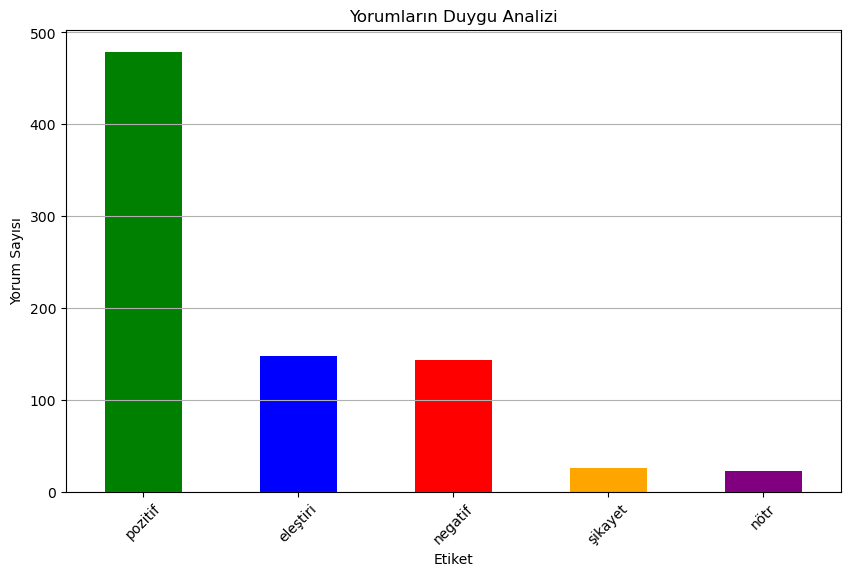

In [17]:
# Her etiketten kaç tane olduğunu hesaplama
etiket_sayisi = df['Etiket'].value_counts()
print("Etiket Sayıları:\n", etiket_sayisi)

# Grafik çizme
plt.figure(figsize=(10, 6))
etiket_sayisi.plot(kind='bar', color=['green', 'blue', 'red', 'orange', 'purple'])
plt.xlabel('Etiket')
plt.ylabel('Yorum Sayısı')
plt.title('Yorumların Duygu Analizi')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Grafiği gösterme
plt.show()

Bu kod, df veri çerçevesindeki etiketlerin dağılımını bir bar grafiği olarak gösterir. İlk olarak, her etiketin kaç kez tekrarlandığını sayar. Ardından, bu sayıları bir bar grafiğinde gösterir. Grafikte etiketler yatay eksende, etiketlerin sayıları ise dikey eksende yer alır. Grafik renkli çubuklarla etiketlerin sıklığını gösterir, başlık, eksen etiketleri ve bir ızgara ile daha okunabilir hale getirilir.

En iyi doğruluk skoru: 0.756969696969697
Data doğruluk oranı: 0.73


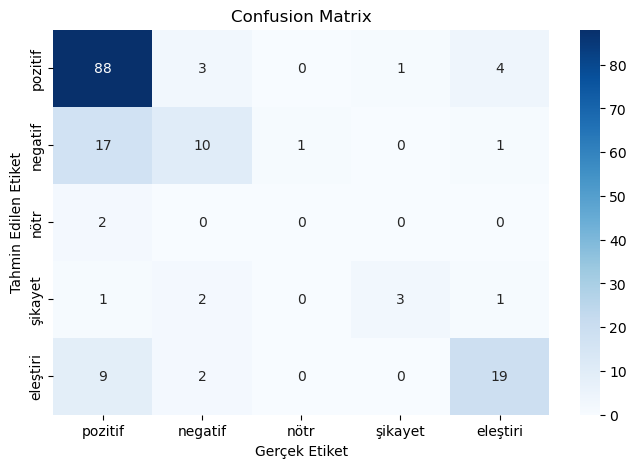

In [19]:
# Veriyi işleme
kokbul = TurkishStemmer()
def stemming(text):
    words = word_tokenize(text)
    stems = [kokbul.stem(w) for w in words if w not in stopwords]
    return ' '.join(stems)

df['stemmed'] = df['Yorum'].apply(stemming)
x = df['stemmed']
y = df['Etiket']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
vectorizer.fit(x_train)
training_features = vectorizer.transform(x_train)    
test_features = vectorizer.transform(x_test)

parametreler = {'C': [1, 10, 100, 1000], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
acc_scorer = make_scorer(accuracy_score)
grid_obj = GridSearchCV(SVC(), parametreler, cv=10, scoring=acc_scorer)
grid_obj = grid_obj.fit(training_features, y_train)
model = grid_obj.best_estimator_
accuracy = grid_obj.best_score_
print(f"En iyi doğruluk skoru: {accuracy}")

model.fit(training_features, y_train)
y_pred = model.predict(test_features)
print("Data doğruluk oranı: {:.2f}".format(accuracy_score(y_test, y_pred)))

# Confusion Matrix'i görselleştirme
etiketler = ['pozitif', 'negatif', 'nötr', 'şikayet', 'eleştiri']
cm = confusion_matrix(y_test, y_pred, labels=etiketler)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=etiketler, yticklabels=etiketler)
plt.xlabel('Gerçek Etiket')
plt.ylabel('Tahmin Edilen Etiket')
plt.title('Confusion Matrix')
plt.show()

Bu kod, modelinizin tahminlerinin ne kadar doğru olduğunu anlamanızı sağlayan bir karışıklık matrisini oluşturur. gercek_etiketler ve tahmin_edilen_etiketler aynı veri çerçevesinden alınan gerçek ve tahmin edilen etiketlerdir. Bu iki etiket listesini karşılaştırarak, her bir etiket için tahminlerin ne kadar doğru veya yanlış yapıldığını gösteren bir ısı haritası oluşturur. Grafikte, her hücre tahminlerin sayısını ve renkler bu sayıları daha kolay anlayabilmenizi sağlar.

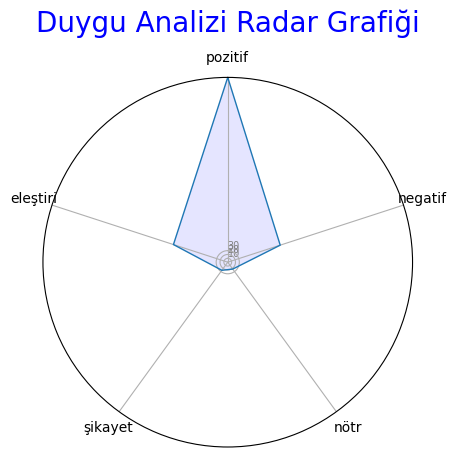

In [20]:
# Radar grafiği oluşturma
# Her bir duygu için sayım
duygu_sayilari = [etiket_sayisi.get(duygu, 0) for duygu in etiketler]

# Duygular
categories = etiketler
N = len(categories)

# Her duygunun açıları
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Radar grafiği
ax = plt.subplot(111, polar=True)

# İlk ekseni yukarı doğru başlatma
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Her bir duygu için eksenleri
plt.xticks(angles[:-1], categories)

# Y ekseni
ax.set_rlabel_position(0)
plt.yticks([10, 20, 30], ["10", "20", "30"], color="grey", size=7)
plt.ylim(0, max(duygu_sayilari))

# Veriyi radar grafiğine ekleme
duygu_sayilari += duygu_sayilari[:1]
ax.plot(angles, duygu_sayilari, linewidth=1, linestyle='solid')
ax.fill(angles, duygu_sayilari, 'b', alpha=0.1)

plt.title('Duygu Analizi Radar Grafiği', size=20, color='blue', y=1.1)
plt.show()